In [1]:
from utils import load_data, train_valid_test_split, evaluate

In [2]:
df = load_data("./data/train.txt")
df.head()

,language,text
0,GER,IThe importance and popularity of travelling ...
1,TUR,"It is an important decision , how to plan you..."
2,CHI,Some people believe that young people can enj...
3,TEL,Travelling is usually considered as good recr...
4,ARA,i agree that . Life is a person live period o...


In [3]:
df["language"].unique()

array(['GER', 'TUR', 'CHI', 'TEL', 'ARA', 'SPA', 'HIN', 'JPN', 'KOR',
       'FRE', 'ITA'], dtype=object)

In [4]:
df["text"].nunique()

9900

In [5]:
df.groupby("language").count()

,text
language,
ARA,900
CHI,900
FRE,900
GER,900
HIN,900
ITA,900
JPN,900
KOR,900
SPA,900


# Langues
* FRA = Français
* GER = Allemand
* ITA = Italien
* ESP = Espagnol
* ARA = Arabe
* KOR = Coréen
* JPN = Japonais
* CHI = Chilien
* TEL = Télougou
* HIN = Hindi
* TUR = Turc

# Découpage
On pourrait faire de la cross-validation pour optimiser les hyperparamètres.
Mais dans un premier temps on peut simplement découper en trois parties notre dataset : Train, Valid et Test.
Comme il y a 900 observations par langue on va découper en 600, 200, 100.

In [6]:
df_train, df_valid, df_test = train_valid_test_split(df, size=(600, 200, 100))

In [7]:
df_train.count()

language    6600
text        6600
dtype: int64

In [8]:
df_valid.count()

language    2200
text        2200
dtype: int64

In [9]:
df_test.count()

language    1100
text        1100
dtype: int64

In [10]:
X = df["text"]
X_train = df_train["text"]
y_train = df_train["language"]
X_valid = df_valid["text"]
y_valid = df_valid["language"]
X_test = df_test["text"]
y_test = df_test["language"]

Nous allons créer un premier pipeline avec une méthode d'évaluation.

# Bag of Words
Bag of Words est la méthode de vectorisation la plus simple qui consiste à compter le nombre d'occurences de chaque mot du vocabulaire.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer()
# On veut le même vocabulaire sur train et test
cv.fit(X)
cv_train = cv.transform(X_train)
cv_valid = cv.transform(X_valid)
cv_test = cv.transform(X_test)
cv_train.shape[0]

6600

# Linear SVC

In [13]:
from sklearn.svm import LinearSVC

In [14]:
model = LinearSVC(random_state=42, max_iter=1500)
model.fit(cv_train, y_train)
y_pred = model.predict(cv_valid)

# Score

In [15]:
from sklearn.metrics import accuracy_score, f1_score

In [16]:
accuracy_score(y_valid, y_pred)

0.6659090909090909

In [17]:
f1_score(y_valid, y_pred, average="macro")

0.6654162399577045

Ici on utilise la f1 score sans pondération. Dans notre cas le type d'erreur n'est pas un critère.

# Matrice de confusion

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

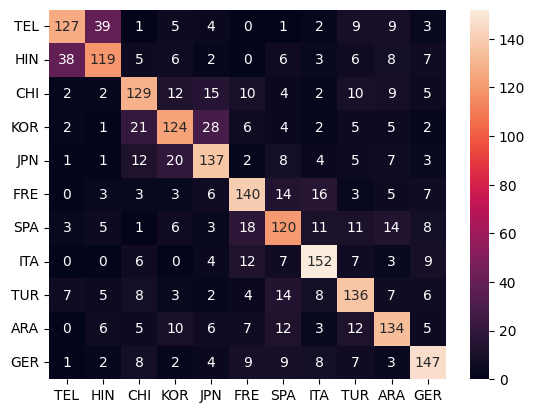

In [19]:
labels = ['TEL', 'HIN', 'CHI', 'KOR', 'JPN', 'FRE', 'SPA', 'ITA', 'TUR', 'ARA', 'GER']
matrix = metrics.confusion_matrix(y_valid, y_pred, labels=labels)
sns.heatmap(matrix, annot=True, fmt='.3g', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()